Net(
  (fc1): Linear(in_features=1, out_features=1, bias=False)
)
[Parameter containing:
tensor([[-0.7993]], requires_grad=True)]


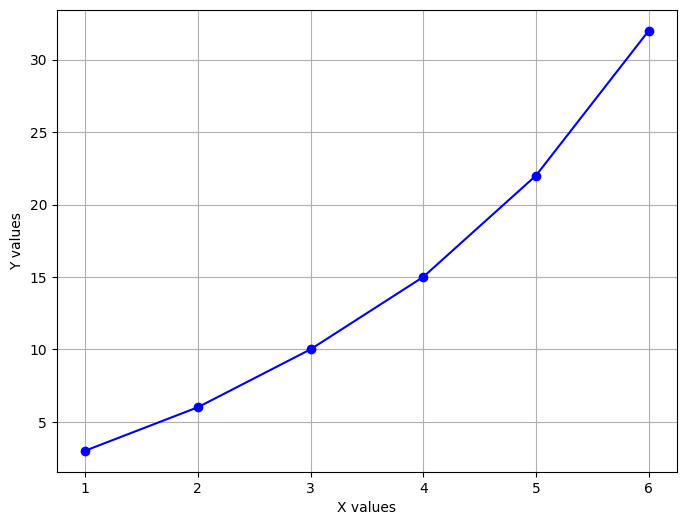

In [5]:
### Training with fancier version ###

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module): ## nn.Module class is used
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,1,bias=False)  # in dim, out dim
        
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()

print(net)
print(list(net.parameters())) # parameters are randomized


#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


optimizer = optim.SGD(net.parameters(), lr=0.1)
#optimizer = optim.Adam(net.parameters(), lr=0.1)


data = [(1.0,3.0), (2.0,6.0), (3.0,10.0), (4.0,15.0), (5.0,22.0), (6.0,32.0)]

# Split data into x and y
x_values, y_values = zip(*data)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.show()

In [2]:
for epoch in range(10): # 0 - 19
    for i, current_data in enumerate(data):
        X, Y = current_data
        X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])
        optimizer.zero_grad()   
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()    ## This line is equivalent to "W = W - lr* W.grad"
    print("Epoch {} - loss: {}".format(epoch, loss))


### Test the trained network ###            
for i, current_data in enumerate(data):
    X, Y = current_data
    X, Y = torch.FloatTensor([X]), torch.FloatTensor([Y])  
    out = net(torch.FloatTensor(X))  
    print("when x = {}, y = {}".format(X, out))
    

Net(
  (fc1): Linear(in_features=1, out_features=1, bias=False)
)
[Parameter containing:
tensor([[0.3427]], requires_grad=True)]
Epoch 0 - loss: 401.5632629394531
Epoch 1 - loss: 15940.7421875
Epoch 2 - loss: 753504.5
Epoch 3 - loss: 36583976.0
Epoch 4 - loss: 1783109632.0
Epoch 5 - loss: 86957383680.0
Epoch 6 - loss: 4241012031488.0
Epoch 7 - loss: 206841346785280.0
Epoch 8 - loss: 1.0088021332328448e+16
Epoch 9 - loss: 4.920110781049078e+17
when x = tensor([1.]), y = tensor([-7.2482e+08], grad_fn=<SqueezeBackward3>)
when x = tensor([2.]), y = tensor([-1.4496e+09], grad_fn=<SqueezeBackward3>)
when x = tensor([3.]), y = tensor([-2.1744e+09], grad_fn=<SqueezeBackward3>)
when x = tensor([4.]), y = tensor([-2.8993e+09], grad_fn=<SqueezeBackward3>)
when x = tensor([5.]), y = tensor([-3.6241e+09], grad_fn=<SqueezeBackward3>)
when x = tensor([6.]), y = tensor([-4.3489e+09], grad_fn=<SqueezeBackward3>)


In [ ]:
X

In [ ]:
for epoch in range(20):
    print(epoch)

In [ ]:
W = torch.tensor([1.0], requires_grad=True)
W = W*2
label = 1.0
loss = W*5 - label 
loss.backward()
W.grad